In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data21 = dd.read_csv(r'훈련생 전달용\iMBANK_CUSTOMER_DATA(K-DigitalTraining)\iMBANK_CUSTOMER_DATA_2021(K-DigitalTraining).csv', encoding = 'cp949')
data22 = dd.read_csv(r'훈련생 전달용\iMBANK_CUSTOMER_DATA(K-DigitalTraining)\iMBANK_CUSTOMER_DATA_2022(K-DigitalTraining).csv', encoding = 'cp949')
data23 = dd.read_csv(r'훈련생 전달용\iMBANK_CUSTOMER_DATA(K-DigitalTraining)\iMBANK_CUSTOMER_DATA_2023(K-DigitalTraining).csv', encoding = 'cp949')

-------------

In [4]:
df4 = data21.compute()

In [5]:
df4['연령'] = df4['연령대'].astype(str).apply(lambda x: x[:2])
df4['연령'] = pd.to_numeric(df4['연령'], errors='coerce')

In [6]:
df4['기준년월'] = df4['기준년월'].astype(int)
data4 = df4.loc[df4.groupby('고객ID')['기준년월'].idxmax()]

In [7]:
pd.options.display.float_format = '{:.1f}'.format

agg = {
    '수신_요구불예금': 'mean',
    '수신_거치식예금': 'mean',
    '수신_펀드': 'mean',
    '수신_외화예금': 'mean',
    '대출금액': 'mean'
}

result4 = data4.groupby('연령').agg(agg).reset_index()

------------------------------

In [8]:
df5 = data22.compute()

In [9]:
df5['연령'] = df5['연령대'].astype(str).apply(lambda x: x[:2])
df5['연령'] = pd.to_numeric(df5['연령'], errors='coerce')

In [10]:
df5['기준년월'] = df5['기준년월'].astype(int)
data5 = df5.loc[df5.groupby('고객ID')['기준년월'].idxmax()]

In [11]:
pd.options.display.float_format = '{:.1f}'.format

agg = {
    '수신_요구불예금': 'mean',
    '수신_거치식예금': 'mean',
    '수신_펀드': 'mean',
    '수신_외화예금': 'mean',
    '대출금액': 'mean'
}

result5 = data5.groupby('연령').agg(agg).reset_index()

--------------------------------

In [12]:
df6 = data23.compute()

In [13]:
df6['연령'] = df6['연령대'].astype(str).apply(lambda x: x[:2])
df6['연령'] = pd.to_numeric(df6['연령'], errors='coerce')

In [14]:
df6['기준년월'] = df6['기준년월'].astype(int)
data6 = df6.loc[df6.groupby('고객ID')['기준년월'].idxmax()]

In [15]:
pd.options.display.float_format = '{:.1f}'.format

agg = {
    '수신_요구불예금': 'mean',
    '수신_거치식예금': 'mean',
    '수신_펀드': 'mean',
    '수신_외화예금': 'mean',
    '대출금액': 'mean'
}

result6 = data6.groupby('연령').agg(agg).reset_index()

--------------------------

In [16]:
data_frames = [result4, result5, result6]  
combined_data = pd.concat(data_frames)

In [17]:
combined_data['총수신액'] = (
    combined_data['수신_요구불예금'] +
    combined_data['수신_거치식예금'] +
    combined_data['수신_펀드'] +
    combined_data['수신_외화예금']
)

combined_data['수신_대출비율'] = combined_data['총수신액'] / combined_data['대출금액']
combined_data.replace([float('inf'), -float('inf')], None, inplace=True)

In [19]:
correlation_matrix = combined_data.corr()  
age_correlation = correlation_matrix['연령'] 

In [20]:
age_correlation

연령          1.0
수신_요구불예금    0.9
수신_거치식예금    0.9
수신_펀드       0.7
수신_외화예금     0.9
대출금액        0.6
총수신액        1.0
수신_대출비율    -0.6
Name: 연령, dtype: float64

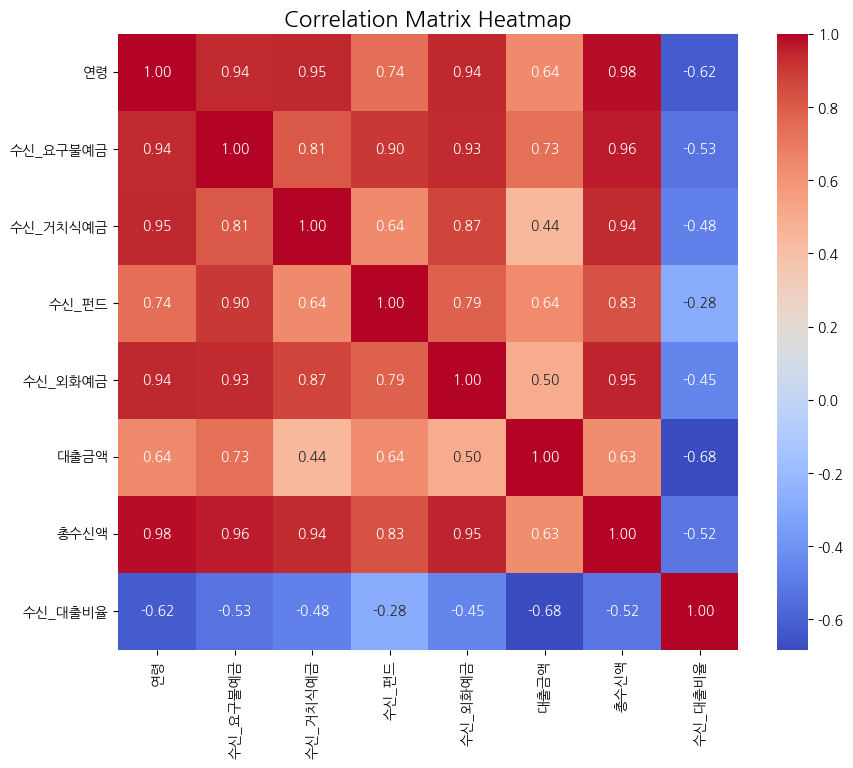

In [21]:
plt.figure(figsize=(10, 8))  
sns.heatmap(
    correlation_matrix,
    annot=True,  
    fmt=".2f",   
    cmap="coolwarm",
    cbar=True    
)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()